In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [15]:
LDA = LinearDiscriminantAnalysis

In [16]:
iris_data = load_iris()
clasificadores = [SVC(kernel='linear'),
                  SVC(kernel='rbf'), 
                  GaussianNB(),
                  KNeighborsClassifier(n_neighbors=3),
                  LDA(),
                  MLPClassifier()]
cv = StratifiedKFold(n_splits=5)
X = iris_data.data
y = iris_data.target

### Validación cruzada con 5 iteraciones

In [3]:
scores = np.zeros((6,))
for i, clf in enumerate(clasificadores):
    pepe = Pipeline([('reduccion_de_dimensiones', PCA(n_components=2)),
                     ('clasificador', clf)])
    score = cross_val_score(estimator=pepe, cv=cv, X=X, y=y, n_jobs=2)
    scores[i] = score.mean()

/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anacon

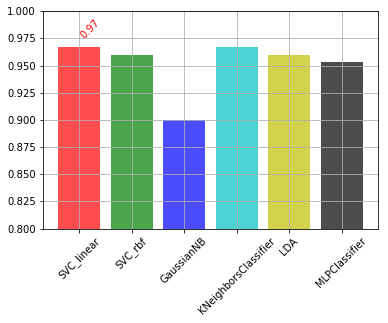

In [5]:
clas_str = ['SVC_linear', 'SVC_rbf', 'GaussianNB',
            'KNeighborsClassifier', 'LDA','MLPClassifier']
plt.bar(np.arange(6), scores, color='rgbcyk', alpha=0.7)
plt.ylim(0.8, 1)
plt.grid()
plt.xticks(np.arange(6), clas_str, rotation=45)
plt.text(s='%.2f'% np.max(scores),
         x=np.argmax(scores),
         y=np.max(scores) + 0.02, color='red',
         rotation=45)
plt.show()

In [6]:
X.shape

(150, 4)

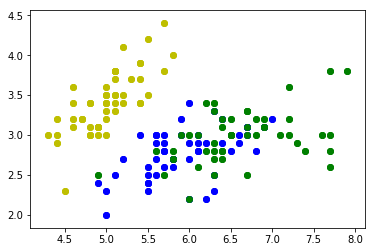

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='y')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.scatter(X[y==2, 0], X[y==2, 1], color='g')
plt.show()

### PCA
Es un método no supervisado para la representación de los datos en un espacio de menor dimensión preservando la mayor cantidad de información posible de los datos originales. (Revisar pdf que incluyo PCA and LDA)

WARNING: Al ser un método no-supervisado no hay garantía de que las direcciones de máxima varianza para los eigenvectores de la matriz de covarianzas contengan buenas características, i. e., las direcciones necesitan presentar ortogonalidad entre clases.

In [33]:
pca = PCA(n_components=3)

In [7]:
PCA?

In [34]:
pca.fit(X=X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
X_transform = pca.transform(X)

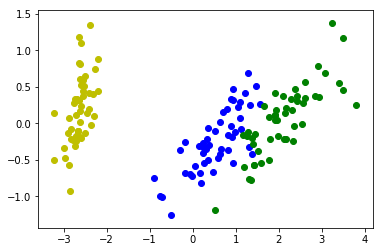

In [36]:
plt.scatter(X_transform[y==0, 0], X_transform[y==0, 1], color='y')
plt.scatter(X_transform[y==1, 0], X_transform[y==1, 1], color='b')
plt.scatter(X_transform[y==2, 0], X_transform[y==2, 1], color='g')
plt.show()

In [37]:
X_transform.shape

(150, 3)

### eigenvectores

In [27]:
pca.explained_variance_

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

### proporción varianza

In [38]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

### Ponderaciones para la transformación lineal

In [39]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091]])

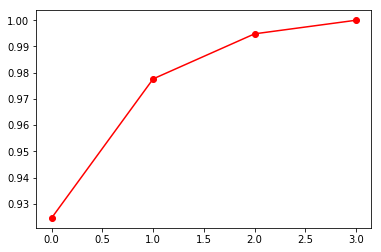

In [40]:
pca = PCA()
pca.fit(X=X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.show()

## LDA
La reduccion con análisis de discriminación lineal es de acuerdo a la correlación con la variable categórica, por lo que generalmente resulta en un espacio de características con mejor separación que PCA. Comúnmente es posible utilizar LDA después de PCA, pero es necesario entender el comportamiento de nuestros datos, puesto que PCA es un método no-supervisado y LDA es supervisado (revisar artículo que incluyo).

In [42]:
lda = LDA()
lda.fit(X=X, y=y)
X_lda = lda.transform(X)

In [44]:
X_lda.shape

(150, 2)

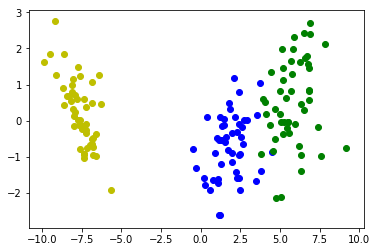

In [45]:
plt.scatter(X_lda[y==0, 0], X_lda[y==0, 1], color='y')
plt.scatter(X_lda[y==1, 0], X_lda[y==1, 1], color='b')
plt.scatter(X_lda[y==2, 0], X_lda[y==2, 1], color='g')
plt.show()

In [40]:
scores = np.zeros((6, 3))
datos = [X, X_transform, X_lda]
for i, clf in enumerate(clasificadores):
    for di, d in enumerate(datos):
        score = cross_val_score(estimator=clf, cv=cv, X=d, y=y, n_jobs=2)
        scores[i, di] = score.mean()

/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/quetzal/anacon

/home/quetzal/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


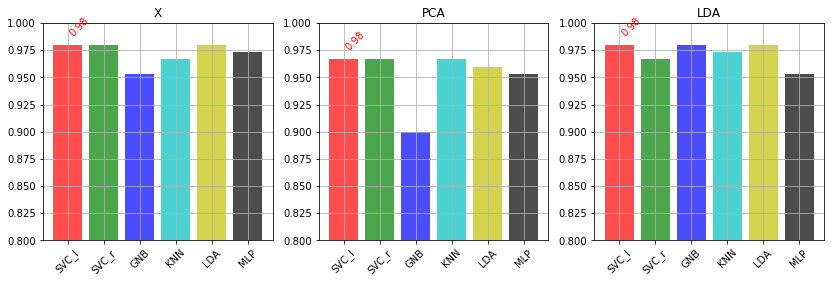

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(14,4))
axes = axes.reshape(-1,)
clas_str = ['SVC_l', 'SVC_r', 'GNB',
            'KNN', 'LDA','MLP']
n_datos = ['X', 'PCA', 'LDA']
for ai, ax in enumerate(axes):
    ax.bar(np.arange(6), scores[:, ai], color='rgbcyk', alpha=0.7)
    ax.set_ylim(0.8, 1)
    ax.grid()
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(clas_str, rotation=45)
    ax.text(s='%.2f'% np.max(scores),
         x=np.argmax(scores[:, ai]),
         y=np.max(scores[:, ai]) + 0.02, color='red',
         rotation=45)
    ax.set_title(n_datos[ai])
fig.show()
plt.show()